In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB

# Reading data

In [168]:
df = pd.read_csv("./onlinefoods.csv")
df.describe()
# df.info()
df.drop(columns={'Unnamed: 12'},inplace=True)
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive


In [169]:
df['Monthly Income'].unique()

array(['No Income', 'Below Rs.10000', 'More than 50000', '10001 to 25000',
       '25001 to 50000'], dtype=object)

##### data visualization:

In [170]:
columns = df.columns
columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback'],
      dtype='object')

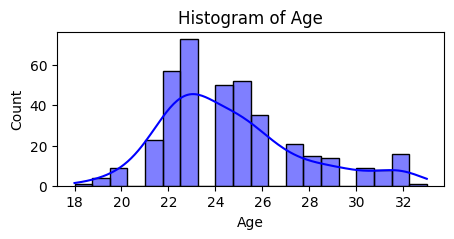

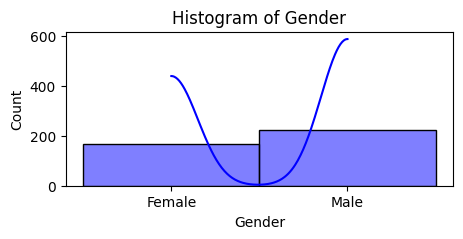

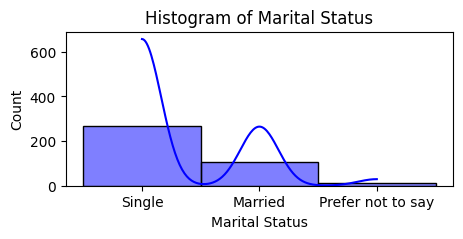

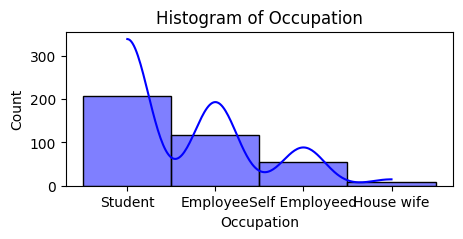

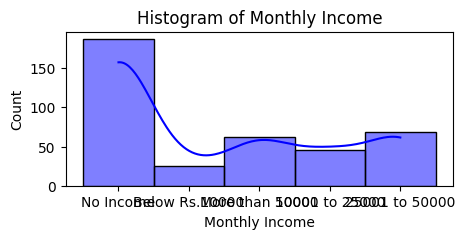

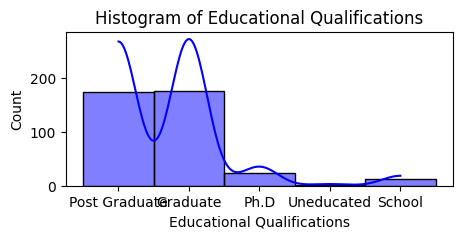

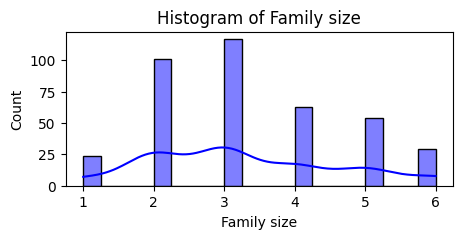

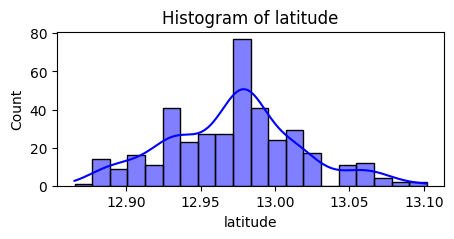

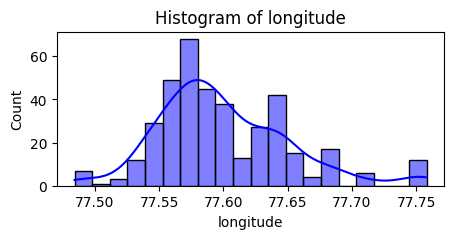

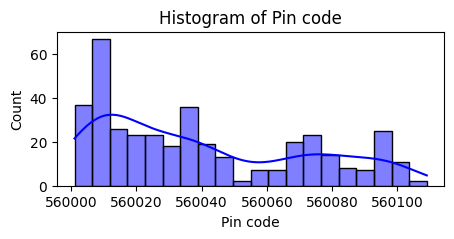

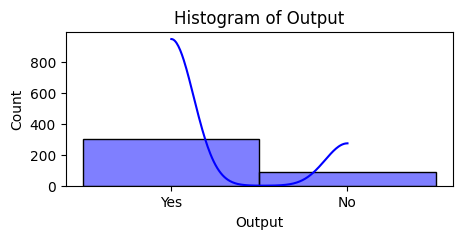

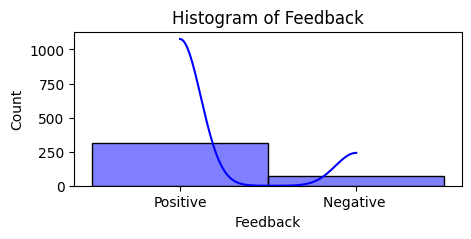

In [171]:
for column in columns:
    plt.figure(figsize=(5, 2)) 
    sns.histplot(df[column], kde=True, bins=20, color='blue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)

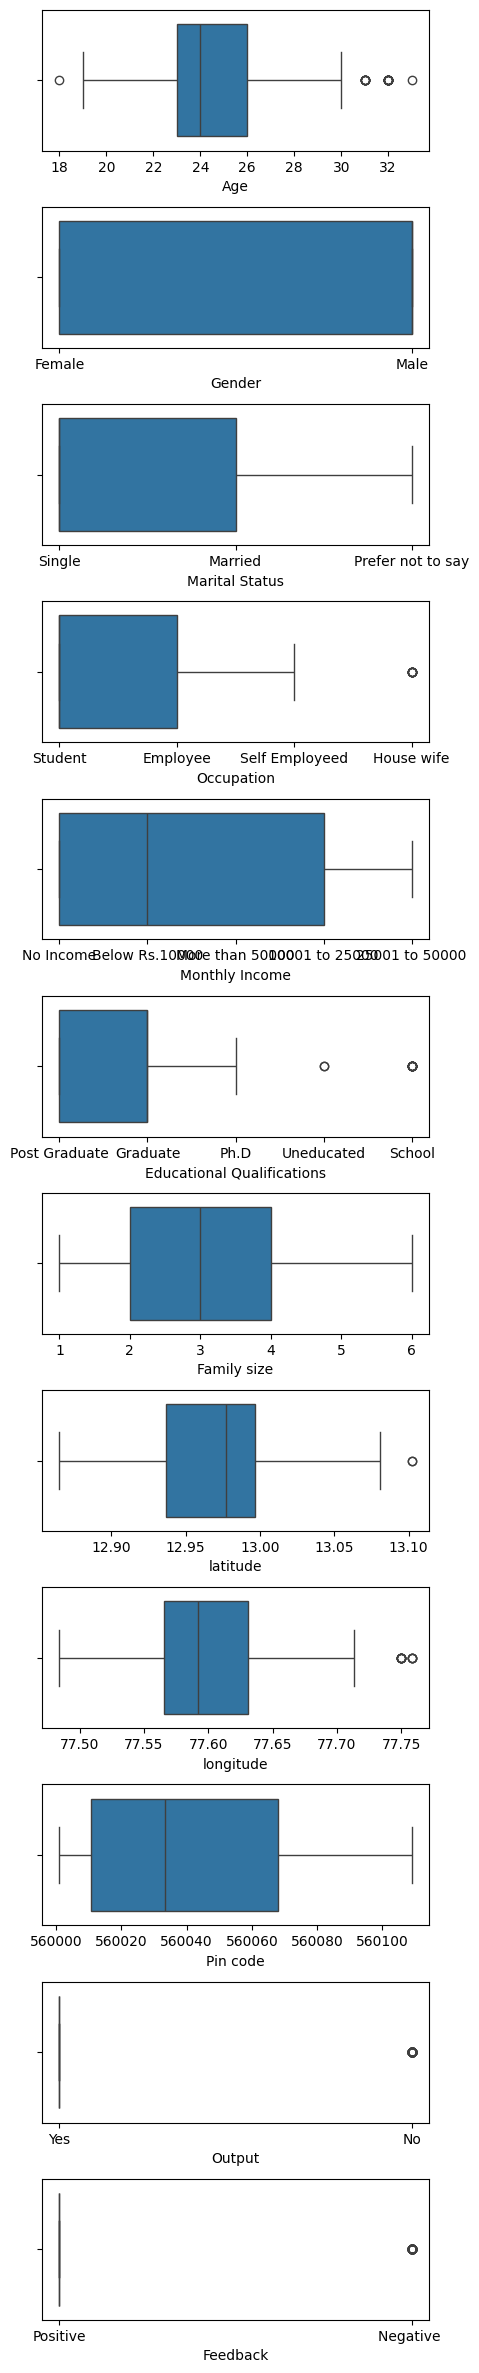

In [172]:
fig, ax = plt.subplots(nrows=len(columns), ncols=1, figsize=(5,30))
fig.subplots_adjust(hspace=0.4)
for i, column in enumerate(columns):
    sns.boxplot(x=column, data=df, ax=ax[i])

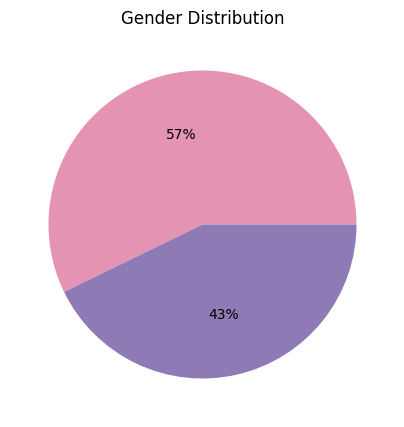

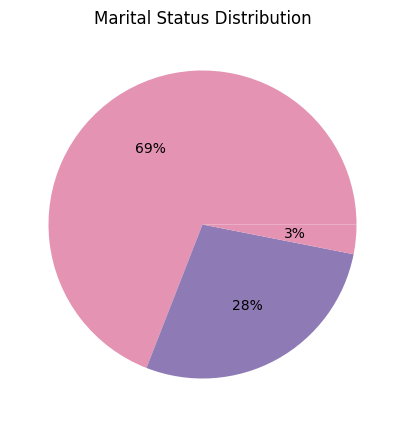

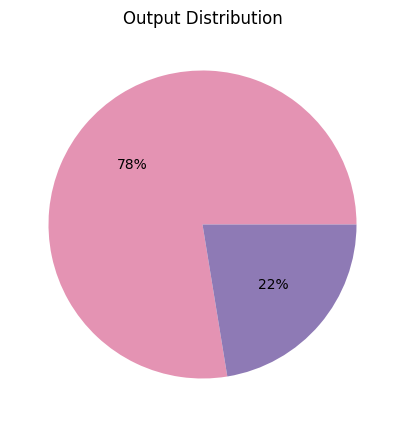

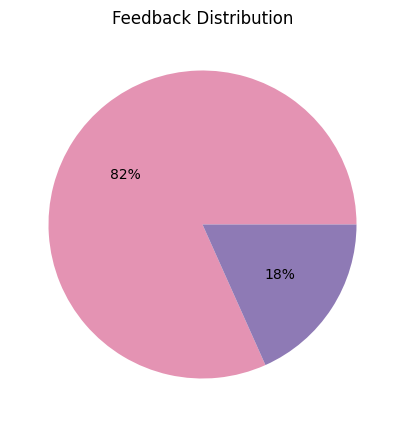

In [173]:
columns_binary = ['Gender','Marital Status','Output','Feedback']
for column in columns_binary:
    genre_count=df[column].value_counts()
    plt.figure(figsize=(5,5))
    plt.title(f"{column} Distribution")
    plt.pie(genre_count, autopct="%.0f%%", colors=["#E493B3","#8E7AB5"])

##### preprocessing:

In [174]:
df.duplicated().sum()

103

In [175]:
df.drop_duplicates(inplace=True)

In [176]:
cat_columns=[]
for col in df.columns:
    if df[col].dtypes=='object':
        cat_columns.append(col)
print(cat_columns)
for column in cat_columns:
    lable_encoder=LabelEncoder()
    df[column]=lable_encoder.fit_transform(df[column])
df.sample(5)

['Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', 'Output', 'Feedback']


,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
22,22,0,2,3,4,0,4,12.9983,77.6409,560033,1,1
260,30,1,0,2,3,0,6,12.9967,77.7582,560067,1,1
34,22,0,2,3,4,2,2,12.9119,77.6446,560102,1,1
202,22,0,2,0,1,0,4,12.8845,77.6036,560076,1,1
187,25,1,2,0,0,0,2,12.9757,77.5586,560023,1,1


In [177]:
minmax_scaler = MinMaxScaler()
df_scaled = minmax_scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,0.133333,0.0,1.0,1.0,1.0,0.5,0.6,0.470439,0.420073,0.000000,1.0,1.0
1,0.400000,0.0,1.0,1.0,0.5,0.0,0.4,0.472128,0.339781,0.074074,1.0,1.0
2,0.266667,1.0,1.0,1.0,0.5,0.5,0.4,0.379645,0.639051,0.148148,1.0,0.0
3,0.266667,0.0,1.0,1.0,1.0,0.0,1.0,0.346706,0.282482,0.166667,1.0,1.0
4,0.266667,1.0,1.0,1.0,0.5,0.5,0.6,0.505912,0.252190,0.083333,1.0,1.0


['No Income', 'Below Rs.10000', 'More than 50000', '10001 to 25000', '25001 to 50000']
is equal to:
[4,2,3,0,1]

# Applying Classification

In [178]:
y = df['Monthly Income'].values
X = df.drop(columns='Monthly Income').values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### applying logestic regression

In [179]:
logestic_regression_model = LogisticRegression(multi_class='multinomial', max_iter=200)
logestic_regression_model.fit(X_train,y_train)

C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200, multi_class='multinomial')

In [180]:
y_pred_lr = logestic_regression_model.predict(X_test)
average_precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
average_recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Percision:", average_precision_lr)
print("Recall:", average_recall_lr)

Accuracy: 0.6140350877192983
Percision: 0.5990447461035696
Recall: 0.6140350877192983


C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##### gaussian naive bayes

In [181]:
#  MultinomialNB, BernoulliNB
gaussian_nb_model = GaussianNB()
gaussian_nb_model.fit(X_train,y_train)

GaussianNB()

In [182]:
y_pred_gnb = gaussian_nb_model.predict(X_test)
average_precision_gnb = precision_score(y_test, y_pred_gnb, average='weighted')
average_recall_gnb = recall_score(y_test, y_pred_gnb, average='weighted')
print("Accuracy:", accuracy_score(y_test, y_pred_gnb))
print("Percision:", average_precision_gnb)
print("Recall:", average_recall_gnb)

Accuracy: 0.543859649122807
Percision: 0.5112781954887218
Recall: 0.543859649122807


##### multinomial naive bayes

In [183]:
multinomial_nb_model = MultinomialNB()
multinomial_nb_model.fit(X_train,y_train)

MultinomialNB()

In [184]:
y_pred_mnb = multinomial_nb_model.predict(X_test)
average_precision_nb = precision_score(y_test, y_pred_mnb, average='weighted')
average_recall_nb = recall_score(y_test, y_pred_mnb, average='weighted')
print("Accuracy:", accuracy_score(y_test, y_pred_mnb))
print("Percision:", average_precision_nb)
print("Recall:", average_recall_nb)

Accuracy: 0.5789473684210527
Percision: 0.4668615984405458
Recall: 0.5789473684210527


C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##### categorical naive bayes

In [185]:
categorical_nb_model = CategoricalNB()
categorical_nb_model.fit(X_train,y_train)

CategoricalNB()

In [186]:
# CategoricalNB
y_pred_cnb = categorical_nb_model.predict(X_test)
average_precision_cnb = precision_score(y_test, y_pred_cnb, average='weighted')
average_recall_cnb = recall_score(y_test, y_pred_cnb, average='weighted')
print("Accuracy:", accuracy_score(y_test, y_pred_cnb))
print("Percision:", average_precision_cnb)
print("Recall:", average_recall_cnb)

Accuracy: 0.6666666666666666
Percision: 0.6992337164750958
Recall: 0.6666666666666666


C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# results

In [187]:
method = ["logestic regression", "gaussian naive bayes","multinomial naive bayes","categorical naive bayes"]
Percision = [average_precision_lr,average_precision_gnb,average_precision_nb,average_precision_cnb]
Recall = [average_recall_lr,average_recall_gnb,average_recall_nb,average_recall_cnb]
table = pd.DataFrame({
    "Method": method,
    "Percision": Percision,
    "Recall": Recall
})
display(table)

,Method,Percision,Recall
0,logestic regression,0.599045,0.614035
1,gaussian naive bayes,0.511278,0.543860
2,multinomial naive bayes,0.466862,0.578947
3,categorical naive bayes,0.699234,0.666667
